In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train_csv = pd.read_csv("datasets/train.csv.zip", compression="zip", header=0)

In [57]:
train_count = None
if train_count != None:
    train = train_csv.sample(n=train_count)
else:
    train = train_csv
y = train["label"]
train = train.drop("label", axis="columns", errors="ignore")
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)
X_train = scale(X_train)
X_test = scale(X_test)


In [ ]:
classifier = RandomForestClassifier()
param_grid = {"n_estimators": [400]}
grid = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    cv=20,
    scoring="accuracy",
    n_jobs=-1,
)
grid.fit(X_train, y_train)


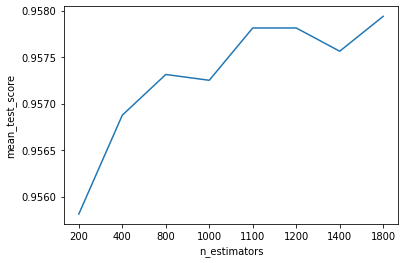

,params,rank_test_score,mean_test_score,std_test_score
n_estimators,,,,
200,{'n_estimators': 200},8,0.955813,0.009506
400,{'n_estimators': 400},7,0.956875,0.007629
800,{'n_estimators': 800},5,0.957313,0.009085
1000,{'n_estimators': 1000},6,0.957250,0.007842
1100,{'n_estimators': 1100},2,0.957812,0.009210
1200,{'n_estimators': 1200},2,0.957812,0.008952
1400,{'n_estimators': 1400},4,0.957563,0.008134
1800,{'n_estimators': 1800},1,0.957937,0.008885


In [49]:
results_df = pd.DataFrame(grid.cv_results_)
# results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("n_estimators")


plt.xlabel("n_estimators")
plt.ylabel("mean_test_score")
plt.plot(results_df.index, results_df["mean_test_score"])
plt.show()
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

In [61]:
# classifier = SVC()
classifier = RandomForestClassifier(n_estimators=500, random_state=1234)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
# prec = precision_score(y_test, y_pred, average=None)
# recall = recall_score(y_test, y_pred, average=None)
num_acc = accuracy_score(y_test, y_pred, normalize=False)

print("accuracy_score : ", acc)
# print("precision_score : ", prec)
# print("recall_score : ", recall)
print("accuracy_count : ", num_acc, " of ", len(y_test))
# take first 10000 samples from train.csv
# train_test_split
# sklearn.preprocess.scale train and test features
# sklearn.svm.SVC
# sklearn.svm.SVC(C=7, gamma=0.009)?
# GridSearch
# RandomForestClassifier


accuracy_score :  0.9569047619047619
accuracy_count :  8038  of  8400


In [64]:
test = pd.read_csv("datasets/test.csv.zip", compression="zip", header=0)
test = scale(test)
predictions = classifier.predict(test)

In [65]:
submission = pd.DataFrame({
    "ImageId": range(1, len(predictions) + 1),
    "Label": predictions
})
submission.to_csv("datasets/submission.csv", index=False)